# Homework #5: Computational Questions

All computations should be done in this notebook using the R kernel. This is your first opportunity to get familiar with R outside of class, so please take your time on the problems that require it. Working in small groups is allowed, but it is important that you make an effort to master the material and hand in your own work. Follow all instructions very closely or points will be deducted.

#### You will be required to submit this notebook, fully compiled with your solutions, as an Jupyter Notebook and as an HTML file to Canvas by 5pm on Wednesday, March 6.

#### Read and sign the Honor Code Pledge below:

**Honor Code Pledge: _On my honor, as a University of Colorado Boulder student, I have neither given nor received unauthorized assistance on this work._**

### _Juan Vargas-Murillo_

## Problem 1

One useful/interesting application of random variables is approximating the area under a curve. Consider $f(x) = \sin(x)$ on the interval $0 \le x \le \pi$. 

In this problem we will use the **uniform random** variables to approximate the area under $f(x)$ on this interval. Note that this general idea is used often to solve really important but hard integrals! Follow all instructions very closely or points will be deducted.

#### (a) Calculate the area under $f(x)=\sin(x),\,0\le x \le \pi$ using the ${\tt integrate()}$ function in R.

In [29]:
true.area <- integrate(sin, 0, pi)
true.area

2 with absolute error < 2.2e-14

#### (b) Now generate $n = 5,000$ uniform random $x$ coordinates from the interval $[0,\pi]$ and, separately, generate $n = 5,000$ uniform random $y$ coordinates from the interval $[0,1]$.

In [2]:
n = 5000
x.coords <- runif(n = n, min = 0, max = pi)
y.coords <- runif(n = n, min = 0, max = 1)

cat("x coordinates sampled from a uniform random distribution on the interval 0 to pi \nx.coords:\n", head(x.coords), "\n" )
cat("\ny coordinates sampled from a uniform random distribution on the interval 0 to 1 \ny.coords:\n", head(y.coords))



x coordinates sampled from a uniform random distribution on the interval 0 to pi 
x.coords:
 0.5331209 2.563255 1.456388 0.06792048 1.823363 1.191381 

y coordinates sampled from a uniform random distribution on the interval 0 to 1 
y.coords:
 0.1229952 0.7643544 0.1767827 0.7273758 0.5530097 0.1697378

#### (c) Now use the $\texttt{cbind()}$ command to combine the points found in part (a) so we have $n = 5,000$ uniform random $(x,y)$ coordinates in the rectangle $x \in [0,\pi], \, y \in [0,1]$ and plot these points and then use the ${\tt curve()}$ command to add a $\sin(x)$ curve for $0 \le x \le \pi$ (the curve should be in the color *red*). 

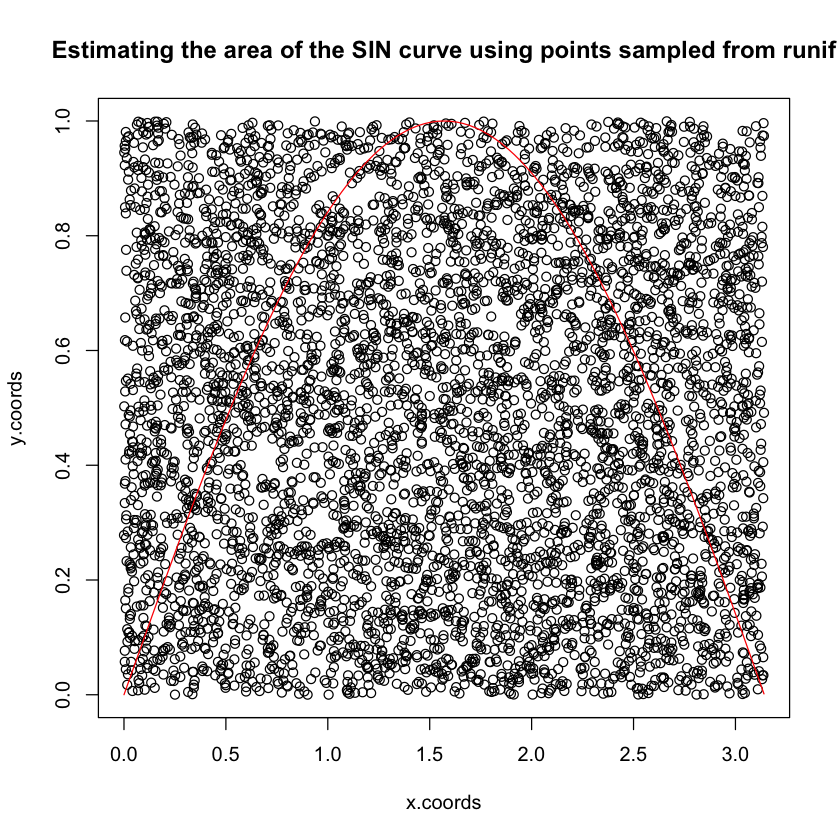

In [4]:
xy.points <- cbind(x.coords, y.coords)
# head(xy.points)
# plot(0:pi, 0:1)
# points(x.coords, y.coords, col = 'blue')
plot(xy.points, main = "Estimating the area of the SIN curve using points sampled from runif")
curve(sin, add = TRUE, col='red')



#### (d)  Now calculate the ratio of points from (b) that fall below $f(x)=\sin(x),\,0\le x \le \pi$ (_use logical indexing_). The area below the curve is proportional to the number of points below the curve, use this ratio to approximate the area under $f(x)$.  

In [15]:
#Note that the area below sin(x) is proportional to 
#the number of points below the sine curve, 
#for example, if half the points were below the curve then 
#the area would be half the area of the rectangle [0,pi]x[0,1]
#which would be pi/2.
points.under <- xy.points[xy.points[,'y.coords'] <= sin(xy.points[,'x.coords'])]

In [25]:
# points.under has entries for both the x and y coordinates, R counts both column lenghts and adds them
# and so we get double the length
# This means we have length(points.under) > n and so we have to divide by 2*n
approx.area <- (sum(points.under) / (2*n)) * pi
approx.area



[1] 1.994896

#### (e) It can be shown that $\displaystyle \int_{0}^{\pi}\sin(x)dx=2$, find the error between our approximation from part (c) and the true area. How can we make this error smaller?




In [31]:
error <- true.area$value - approx.area
error

[1] 0.005103846

**STUDENT ANSWER***: We can make this error smaller by increasing the number of samples we sample from the random uniform distribution. 

## Problem 2

#### In this problem we will run a simulation that estimates a probability calculation. Suppose 3 fair, six sided dice are rolled and their face value is summed up. We run a simulation to empirically determine the probability of observing a sum of 12.

##### You will approximate the probability by writing a loop that will generate $N=100,000$ dice rolls and count how many times a sum of 12 appears. The probability then is the number of times a sum of 12 appears divided by $N=100,000$. Follow all instructions very closely or points will be deducted.

#### (a) Create a vector called ${\tt dice}$ that contains the numbers 1 through 6.

In [32]:
dice <- c(1:6)

#### (b) Now write a loop that will generate $N=100,000$ dice rolls. Use the $sample()$ command to generate the dice rolls. 

#### The loop you write should also calculate the total sum of the dice roll and should have a variable called ${\tt counter}$ that keeps track of the number of times a sum of 12 is observed. Display the final value of the variable ${\tt counter}$  by including the following command after your code for the loop: 

${\tt \textrm{cat("Frequency of observed sum of 12 is: ",counter)}}$.

In [35]:
set.seed(42)

# N set to 10 million provides the closest approximate value to 0.1157
# N=10000000

N = 100000
i=1

counter=0

while(i<=N){
    sampleroll<-sample(dice, 3, replace=TRUE)
    sum12<-sum(sampleroll)
    
    if(sum12==12){
        counter=counter+1
    }
    i=i+1
}
#Probability of rolling a sum of 12 code goes here:



cat("Frequency of observed sum of 12 is: ",counter)


Frequency of observed sum of 12 is:  11816

#### (c) Now determine the empirical probability by dividing the number of times a 12 was observed above in part (b) by $N=100,000$. The calculated probability is 25/216 or approximately 0.1157.

In [34]:
cat("\nProbability", counter/N)


Probability 0.11816